## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Load the dataset

In [2]:
train_dataset = pd.read_csv('train.csv', index_col='ID')
test_dataset = pd.read_csv('test.csv', index_col='ID')

In [3]:
train_dataset.head()

,col_0,col_1,col_2,col_3,col_4,col_5,y
ID,,,,,,,
1,A1,0.423913,310.7,-1.302803,0.889328,1737,C3
2,A0,0.586957,310.1,0.021376,0.640316,1483,C1
3,A0,0.934783,313.3,-0.570492,0.636364,1507,C1
4,A1,0.402174,308.6,-0.921600,0.387352,1648,C1
5,A2,0.532609,311.4,-0.389922,0.557312,1506,C1


In [4]:
test_dataset.head()

,col_0,col_1,col_2,col_3,col_4,col_5
ID,,,,,,
6001,A1,0.434783,309.0,1.044606,0.553360,1447
6002,A0,0.423913,310.8,-0.018750,0.699605,1502
6003,A1,0.489130,311.1,0.733625,0.743083,1452
6004,A2,0.380435,309.8,-0.409985,0.675889,1490
6005,A0,0.608696,310.7,-1.272708,0.300395,1696


In [5]:
train_dataset.shape

(6000, 7)

In [6]:
test_dataset.shape

(4000, 6)

In [7]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 1 to 6000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_0   6000 non-null   object 
 1   col_1   6000 non-null   float64
 2   col_2   6000 non-null   float64
 3   col_3   6000 non-null   float64
 4   col_4   6000 non-null   float64
 5   col_5   6000 non-null   int64  
 6   y       6000 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 375.0+ KB


#### Check the missing value

In [8]:
train_dataset.isnull().sum()

col_0    0
col_1    0
col_2    0
col_3    0
col_4    0
col_5    0
y        0
dtype: int64

In [9]:
# count the value of y (target) column
train_dataset['y'].value_counts()

C1    5791
C6      67
C2      57
C4      47
C3      27
C5      11
Name: y, dtype: int64

In [10]:
#drop the ID column
#train_dataset.drop(columns=['ID'], inplace=True)

#### Label encoding for categorical variables of training data

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
train_dataset['col_0'] = labelencoder_Y.fit_transform(train_dataset['col_0'])
train_dataset['y'] = labelencoder_Y.fit_transform(train_dataset['y'])

In [12]:
train_dataset

,col_0,col_1,col_2,col_3,col_4,col_5,y
ID,,,,,,,
1,4,0.423913,310.7,-1.302803,0.889328,1737,2
2,3,0.586957,310.1,0.021376,0.640316,1483,0
3,3,0.934783,313.3,-0.570492,0.636364,1507,0
4,4,0.402174,308.6,-0.921600,0.387352,1648,0
5,5,0.532609,311.4,-0.389922,0.557312,1506,0
...,...,...,...,...,...,...,...
5996,3,0.206522,308.5,0.693498,0.683794,1487,0
5997,4,0.445652,309.2,-0.099004,0.102767,1564,0
5998,4,0.445652,308.7,2.298564,0.529644,1446,1


In [13]:
# describe the dataset
train_dataset.describe()

,col_0,col_1,col_2,col_3,col_4,col_5,y
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,3.745167,0.515467,310.033500,-0.001252,0.426462,1539.270833,0.105167
std,0.733473,0.217382,1.476985,1.002851,0.251926,181.277115,0.628893
min,0.000000,0.010870,305.800000,-3.630149,0.000000,1168.000000,0.000000
25%,3.000000,0.336957,308.900000,-0.680840,0.212451,1422.000000,0.000000
50%,4.000000,0.521739,310.100000,0.011345,0.426877,1503.000000,0.000000
75%,4.000000,0.673913,311.100000,0.675943,0.640316,1614.000000,0.000000
max,5.000000,1.000000,313.800000,3.552522,1.000000,2886.000000,5.000000


#### Correlation matrix

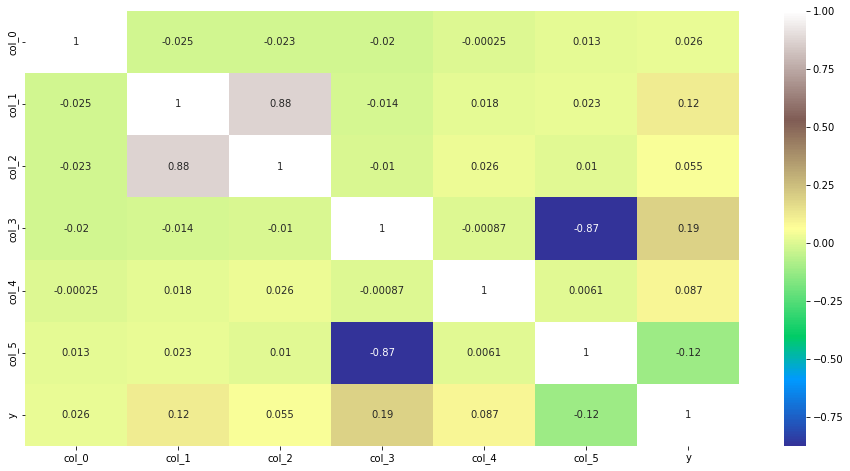

In [14]:
plt.figure(figsize=(16, 8))
sns.heatmap(train_dataset.corr(), annot=True, cmap='terrain')
plt.show()

#### Split the training data into features and target

In [15]:
x = train_dataset.iloc[:,:-1]
y = train_dataset.iloc[:,-1]

In [16]:
y.value_counts()

0    5791
5      67
1      57
3      47
2      27
4      11
Name: y, dtype: int64

In [17]:
#from imblearn.over_sampling import RandomOverSampler
#r_oversample = RandomOverSampler(random_state=42)
#x_resampled, y_resampled = r_oversample.fit_resample(x, y)

In [18]:
#from collections import Counter
#print('Original dataset shape {}'.format(Counter(y)))
#print('Resampled dataset shape {}'.format(Counter(y_resampled)))

In [19]:
y.value_counts()

0    5791
5      67
1      57
3      47
2      27
4      11
Name: y, dtype: int64

#### Train test split

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

#### Perform oversampling

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [22]:
xtrain.shape

(4800, 6)

In [23]:
ytrain.shape

(4800,)

In [24]:
xtest.shape

(1200, 6)

In [25]:
ytest.shape

(1200,)

#### Normalize the data for numerical features

In [26]:
from sklearn.preprocessing import StandardScaler
xtrain_scaled = StandardScaler().fit_transform(xtrain)
xtest_scaled = StandardScaler().fit_transform(xtest)

In [27]:
from imblearn.over_sampling import RandomOverSampler
r_oversample = RandomOverSampler(random_state=42)
x_resampled, y_resampled = r_oversample.fit_resample(xtrain_scaled, ytrain)

In [28]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_resampled)))

Original dataset shape Counter({0: 5791, 5: 67, 1: 57, 3: 47, 2: 27, 4: 11})
Resampled dataset shape Counter({0: 4633, 1: 4633, 2: 4633, 3: 4633, 4: 4633, 5: 4633})


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(xtrain_scaled, ytrain)

## Model training

#### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [30]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [31]:
y_predict = rf_model.predict(xtest)
#accuracy = accuracy_score(ytest, y_pred)
#print("RF Model Accuracy is ", accuracy)
print("Random Forest")
print(classification_report(ytest, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1158
           1       0.25      0.43      0.32         7
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        17

    accuracy                           0.96      1200
   macro avg       0.24      0.28      0.26      1200
weighted avg       0.94      0.96      0.95      1200



<AxesSubplot:>

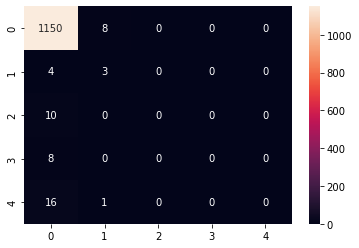

In [32]:
cm = confusion_matrix(ytest, y_predict)
sns.heatmap(cm, annot=True, fmt = 'g')

#### SVM

In [58]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_resampled, y_resampled)
y_predict_svm = svm_model.predict(xtest)
print("SVM - Support Vector Machine")
print(classification_report(ytest, y_predict_svm))

SVM - Support Vector Machine
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1158
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        17

    accuracy                           0.96      1200
   macro avg       0.19      0.20      0.20      1200
weighted avg       0.93      0.96      0.95      1200



<AxesSubplot:>

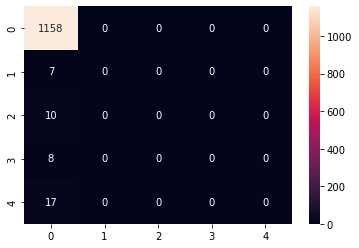

In [59]:
cm = confusion_matrix(ytest, y_predict_svm)
sns.heatmap(cm, annot=True, fmt = 'g')

#### Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_resampled, y_resampled)
y_predict_dt = dt.predict(xtest)
print(classification_report(ytest, y_predict_dt))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1158
           1       0.12      0.57      0.20         7
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        17

    accuracy                           0.95      1200
   macro avg       0.22      0.31      0.23      1200
weighted avg       0.94      0.95      0.94      1200



## Make Prediction on Test Dataset

In [33]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 6001 to 10000
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_0   4000 non-null   object 
 1   col_1   4000 non-null   float64
 2   col_2   4000 non-null   float64
 3   col_3   4000 non-null   float64
 4   col_4   4000 non-null   float64
 5   col_5   4000 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 218.8+ KB


In [34]:
test_dataset.isnull().sum()

col_0    0
col_1    0
col_2    0
col_3    0
col_4    0
col_5    0
dtype: int64

In [35]:
index_column = test_dataset.index

#### Label encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
test_dataset['col_0'] = labelencoder_Y.fit_transform(test_dataset['col_0'])

In [37]:
test_dataset

,col_0,col_1,col_2,col_3,col_4,col_5
ID,,,,,,
6001,4,0.434783,309.0,1.044606,0.553360,1447
6002,3,0.423913,310.8,-0.018750,0.699605,1502
6003,4,0.489130,311.1,0.733625,0.743083,1452
6004,5,0.380435,309.8,-0.409985,0.675889,1490
6005,3,0.608696,310.7,-1.272708,0.300395,1696
...,...,...,...,...,...,...
9996,1,0.663043,311.0,-1.162360,0.501976,1701
9997,4,0.532609,310.3,-0.129098,0.189723,1514
9998,4,0.413043,310.4,-0.901537,0.509881,1657


In [38]:
test_dataset_scaled = StandardScaler().fit_transform(test_dataset)

### Prediction results

##### Random Forest

In [39]:
y_predict_test = rf_model.predict(test_dataset_scaled)

In [40]:
print(y_predict_test)

[0 0 0 ... 0 0 0]


In [41]:
#test_dataset['y'] = y_pred

In [49]:
predict_y_col = pd.DataFrame({'y': y_predict_test})
predict_y_col.to_csv('y_predict_test.csv', index=False)
predict_y = pd.read_csv('y_predict_test.csv')
predict_y

,y
0,0
1,0
2,0
3,0
4,0
...,...
3995,0
3996,0
3997,0
3998,0


#### F1 Score - Random Forest

In [51]:
from sklearn.metrics import f1_score
f1_scores = f1_score(predict_y, y_predict_test, average='weighted')
print(f"F1 Score: {f1_scores}")

F1 Score: 1.0


### SVM - Predict on test data

In [63]:
svm_y_predict_test = svm_model.predict(test_dataset_scaled)
svm_y_predict_test

array([0, 0, 0, ..., 0, 1, 0])

In [65]:
predict_y_column = pd.DataFrame({'y': svm_y_predict_test})
predict_y_column.to_csv('svm_y_predict_test.csv', index=False)
svm_predict_y = pd.read_csv('svm_y_predict_test.csv')
svm_predict_y

,y
0,0
1,0
2,0
3,0
4,0
...,...
3995,0
3996,0
3997,0
3998,1


### F1 score - SVM

In [66]:
from sklearn.metrics import f1_score
f1_scores = f1_score(predict_y, svm_y_predict_test, average='weighted')
print(f"F1 Score: {f1_scores}")

F1 Score: 0.9343759185702095


### Decision Tree - Predict on test data

In [64]:
dt_y_predict_test = dt.predict(test_dataset_scaled)
dt_y_predict_test

array([0, 0, 0, ..., 0, 0, 0])

## Convert numerical prediction into categorical value (SVM)

In [52]:
pred_label_dict = {
    0: 'C1',
    1: 'C2',
    2: 'C3',
    3: 'C4',
    4: 'C5',
    5: 'C6'
}

svm_y_predict_categorical = [pred_label_dict[value] for value in svm_y_predict_test]

#### Generate prediction result  csv file 

In [53]:
predict_df = pd.DataFrame({ 'ID': index_column, 'y': svm_y_predict_categorical})
predict_df.to_csv('shamim_khaled.csv', index=False)

In [54]:
svm_prediction_results = pd.read_csv('shamim_khaled.csv', index_col='ID')
svm_prediction_results

,y
ID,
6001,C1
6002,C1
6003,C1
6004,C1
6005,C1
...,...
9996,C1
9997,C1
9998,C1
